# **Import library and load data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris=pd.read_excel("/content/iris (1).xls")

# **Check the data information**

In [4]:
iris.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# **Handling missing values**

In [8]:
iris['SL'].fillna(iris['SL'].mean(),inplace=True)

In [9]:
iris['SW'].fillna(iris['SW'].mean(),inplace=True)

In [10]:
iris['PL'].fillna(iris['PL'].mean(),inplace=True)

In [11]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [13]:
iris.drop(['Classification'], axis=1)

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [14]:
iris['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# **Explorary data analysis**

Text(0.5, 1.0, 'Sepal Width versus Length for virginica species')

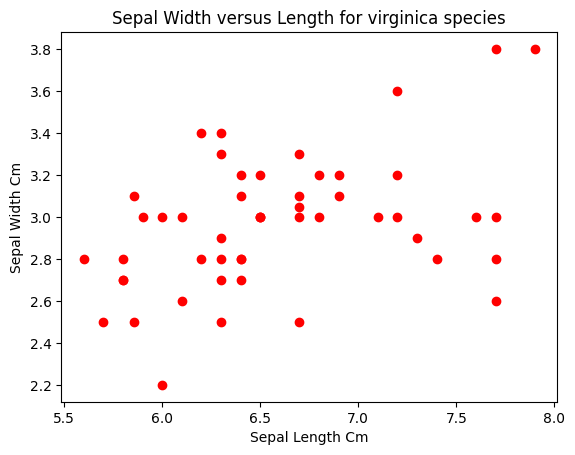

In [15]:
sub_virginica=iris[iris['Classification']=='Iris-virginica']
# Create a scatter plot of the Sepal
plt.scatter(sub_virginica['SL'], sub_virginica['SW'], marker='o', color='r')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')
plt.title('Sepal Width versus Length for virginica species')

# **Train a Model**

In [16]:
X=iris.drop(['Classification'], axis=1)
y=iris['Classification']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.5, shuffle=True,random_state=100)

In [18]:
from sklearn.svm import SVC
svc_classifier=SVC()
svc_classifier.fit(X_train,y_train)
svc_predictions=svc_classifier.predict(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
knn_predictions=knn_classifier.predict(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# **Model Evaluation**

In [21]:
from sklearn.metrics import accuracy_score

svc_accuracy=accuracy_score(y_test,svc_predictions)
knn_accuracy=accuracy_score(y_test,knn_predictions)


print('Support Vector Classifier Accuracy:',svc_accuracy)
print('K-Nearest Neighbors Classifier Accuracy:',knn_accuracy)

Support Vector Classifier Accuracy: 0.9066666666666666
K-Nearest Neighbors Classifier Accuracy: 0.92


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(confusion_matrix(svc_predictions,y_test))
print(classification_report(knn_predictions,y_test))

[[26  0  0]
 [ 2 17  5]
 [ 0  0 25]]
                 precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.96        26
Iris-versicolor       1.00      0.74      0.85        23
 Iris-virginica       0.87      1.00      0.93        26

       accuracy                           0.92        75
      macro avg       0.93      0.91      0.91        75
   weighted avg       0.93      0.92      0.92        75



In [23]:
y_pred1=svc_classifier.predict(X_test)
y_pred1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
      

In [24]:
y_pred2=knn_classifier.predict(X_test)
y_pred2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       

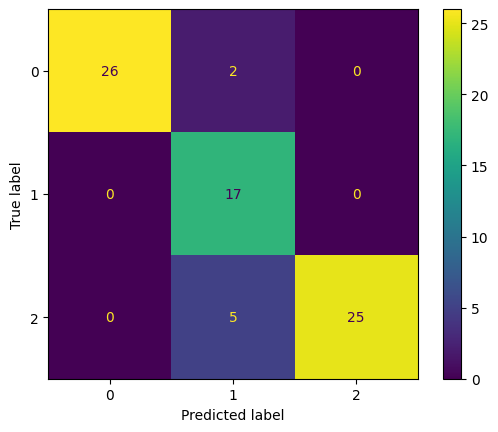

In [25]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


result=confusion_matrix(y_test,y_pred1)
result
cmd=ConfusionMatrixDisplay(result)
cmd.plot()

In [26]:
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Accuracy after Imputation: {rf_accuracy:.4f}")


Random Forest Accuracy after Imputation: 0.9467


In [27]:
print('Support Vector Classifier Accuracy:',svc_accuracy)
print('K-Nearest Neighbors Classifier Accuracy:',knn_accuracy)
print('Random Forest Classifier Accuracy:',rf_accuracy)

Support Vector Classifier Accuracy: 0.9066666666666666
K-Nearest Neighbors Classifier Accuracy: 0.92
Random Forest Classifier Accuracy: 0.9466666666666667


Based on the accuracy scores for the Support Vector Classifier (SVC), K-Nearest Neighbors Classifier (KNN), and Random Forest Classifier, the Random Forest model achieved the highest accuracy at 94.67%. The Random Forest Classifier's superior accuracy suggests that it performed the best among the three models in classifying Iris flower CLasiification.